Steps for the Analysis:
1. Load and Inspect the Data: Get an overview of the dataset, check for missing values, and understand the basic statistics.

2. Key Metrics:
    a. Distribution of accident types, severity, weather conditions.
    b. Time-based analysis (e.g., monthly trends).
    c. Vehicle and fatality counts.

3. Visualizations:
    a. Accident types and severities.
    b. Accidents over time.
    c. Weather impact on accidents.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('C:/Users/pc/Downloads/traffic_accident_data.csv')

In [60]:
data.head()

,Date,Time,Weather_Condition,Time_of_Day,Road_Condition,Type_of_Accident,Location,Severity,State,Latitude,Longitude,Number_of_Vehicles_Involved,Number_of_Injuries,Number_of_Fatalities
0,2023-01-01,07:46,Fog,Night,Icy,Single vehicle crash,Highway,Severe,North Carolina,30.299387,-80.869279,3,4,3
1,2023-01-01,01:09,Cloudy,Afternoon,Dry,Single vehicle crash,Rural,Fatal,Illinois,34.358404,-71.560467,4,1,1
2,2023-01-01,15:30,Cloudy,Afternoon,Snowy,Rear-end collision,Suburban,Fatal,California,27.650985,-106.043475,3,6,0
3,2023-01-01,23:19,Rain,Evening,Icy,Head-on collision,Highway,Fatal,Texas,33.955790,-80.314315,5,1,2
4,2023-01-01,23:04,Rain,Afternoon,Icy,Single vehicle crash,Highway,Minor,Illinois,38.640795,-87.886749,3,3,2


In [61]:
data.describe()

,Latitude,Longitude,Number_of_Vehicles_Involved,Number_of_Injuries,Number_of_Fatalities
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,36.865037,-96.648302,2.947333,4.888000,1.462000
std,6.863739,16.540128,1.399237,3.162613,1.125493
min,25.000576,-124.975749,1.000000,0.000000,0.000000
25%,30.904105,-110.619565,2.000000,2.000000,0.000000
50%,36.576307,-96.567763,3.000000,5.000000,1.000000
75%,42.685433,-82.571406,4.000000,8.000000,2.000000
max,48.988175,-67.195879,5.000000,10.000000,3.000000


In [62]:
data.isnull().sum()

Date                           0
Time                           0
Weather_Condition              0
Time_of_Day                    0
Road_Condition                 0
Type_of_Accident               0
Location                       0
Severity                       0
State                          0
Latitude                       0
Longitude                      0
Number_of_Vehicles_Involved    0
Number_of_Injuries             0
Number_of_Fatalities           0
dtype: int64

## Distribution of Accident Types

In [63]:
# Count of different types of accidents
accident_type_counts = data['Type_of_Accident'].value_counts()
print("Accident Type Distribution:\n", accident_type_counts)

Accident Type Distribution:
 Multi-vehicle crash     322
Rear-end collision      310
Head-on collision       303
Single vehicle crash    284
Side-impact             281
Name: Type_of_Accident, dtype: int64


Most Accident Type : Multi-vehicle crash

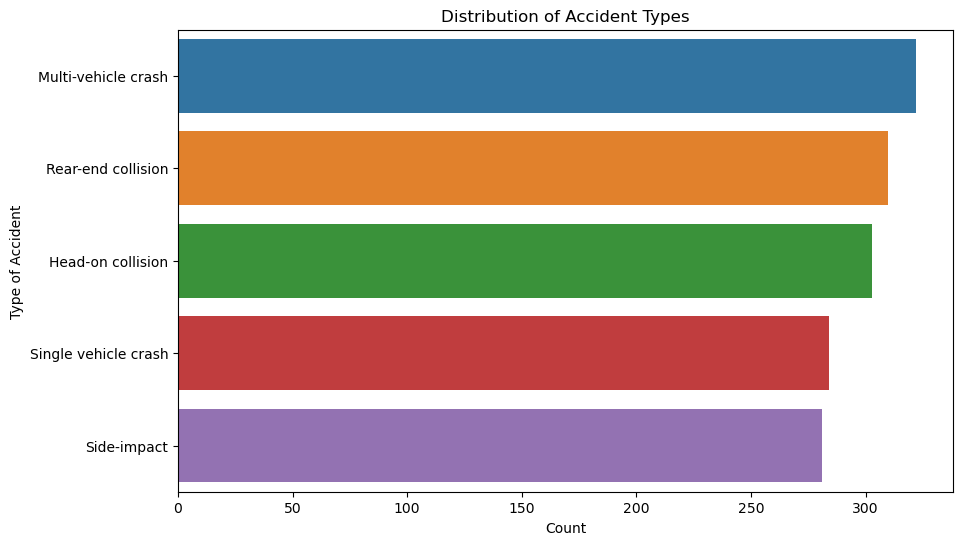

In [64]:
# Bar plot for accident types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Type_of_Accident', order=data['Type_of_Accident'].value_counts().index)
plt.title('Distribution of Accident Types')
plt.xlabel('Count')
plt.ylabel('Type of Accident')
plt.show()

## Distribution of Accident Severity

In [65]:
# Count of accident severity
severity_counts = data['Severity'].value_counts()
print("Accident Severity Distribution:\n", severity_counts)

Accident Severity Distribution:
 Minor       383
Severe      379
Fatal       377
Moderate    361
Name: Severity, dtype: int64


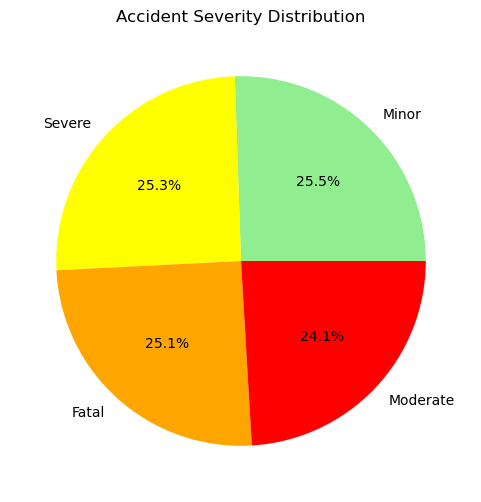

In [66]:
# Pie chart for accident severity distribution
plt.figure(figsize=(6, 6))
data['Severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'yellow', 'orange', 'red'])
plt.title('Accident Severity Distribution')
plt.ylabel('')
plt.show()

Distribution of Weather Condition

In [67]:
# Count of accidents under different weather conditions
weather_condition_counts = data['Weather_Condition'].value_counts()
print("Accidents under different Weather Conditions:\n", weather_condition_counts)

Accidents under different Weather Conditions:
 Clear           260
Snow            254
Cloudy          249
Thunderstorm    249
Fog             246
Rain            242
Name: Weather_Condition, dtype: int64


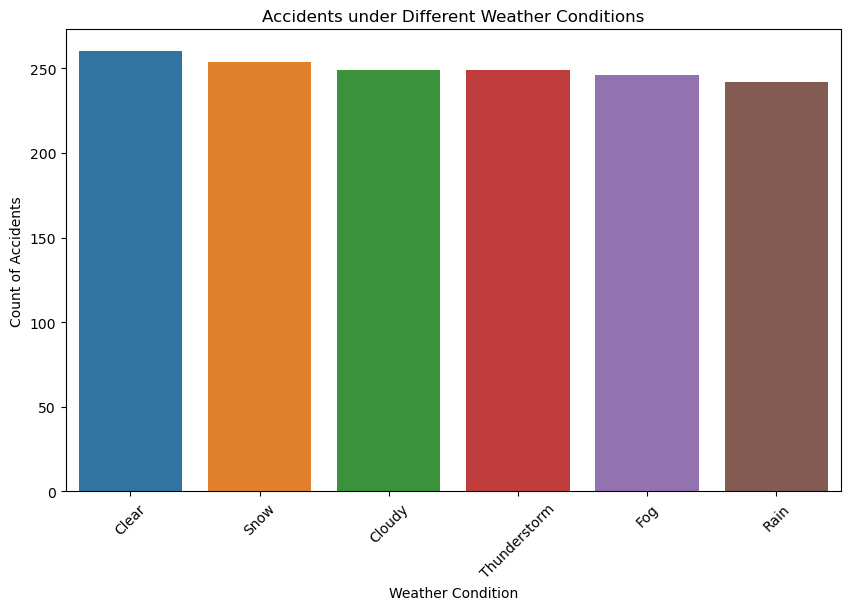

In [68]:
# Bar plot for weather conditions and accidents
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Condition', order=data['Weather_Condition'].value_counts().index)
plt.title('Accidents under Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.show()

Monthly Trend

In [69]:
# Convert 'Date' to datetime and extract month-year
data['Month_Year'] = pd.to_datetime(data['Date']).dt.to_period('M')

# Count of accidents per month
monthly_trends = data['Month_Year'].value_counts().sort_index()
print("Monthly Accident Trends:\n", monthly_trends)


Monthly Accident Trends:
 2023-01    744
2023-02    672
2023-03     84
Freq: M, Name: Month_Year, dtype: int64


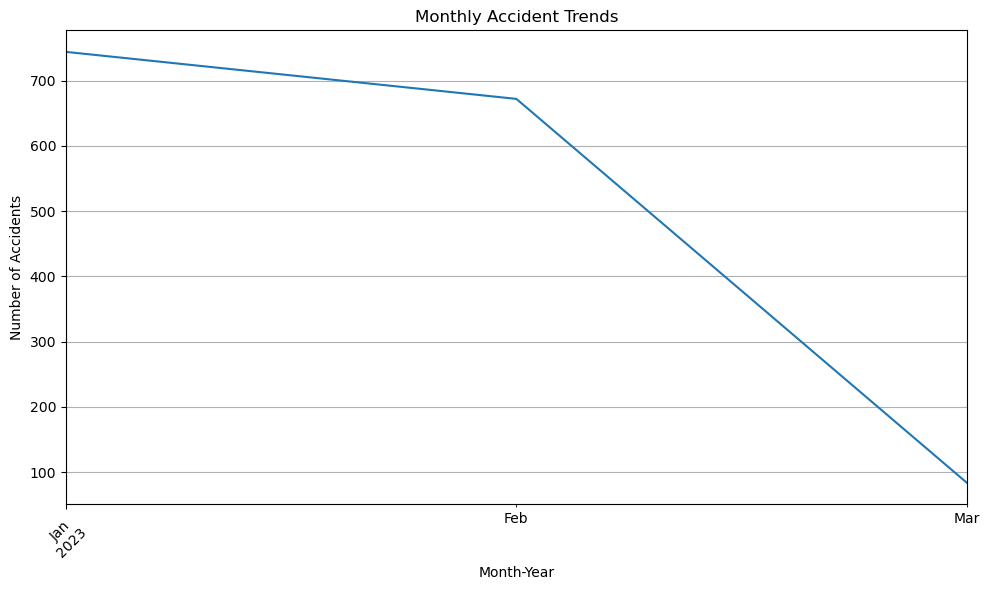

In [70]:
# Plot monthly accident trends
plt.figure(figsize=(10, 6))
monthly_trends.sort_index().plot()
plt.title('Monthly Accident Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribution of Accident Types by Location

Accident Types by Location:
 Location              Highway  Rural  Suburban  Urban
Type_of_Accident                                     
Head-on collision          71     74        88     70
Multi-vehicle crash        76     78        73     95
Rear-end collision         86     73        84     67
Side-impact                57     75        80     69
Single vehicle crash       85     64        61     74


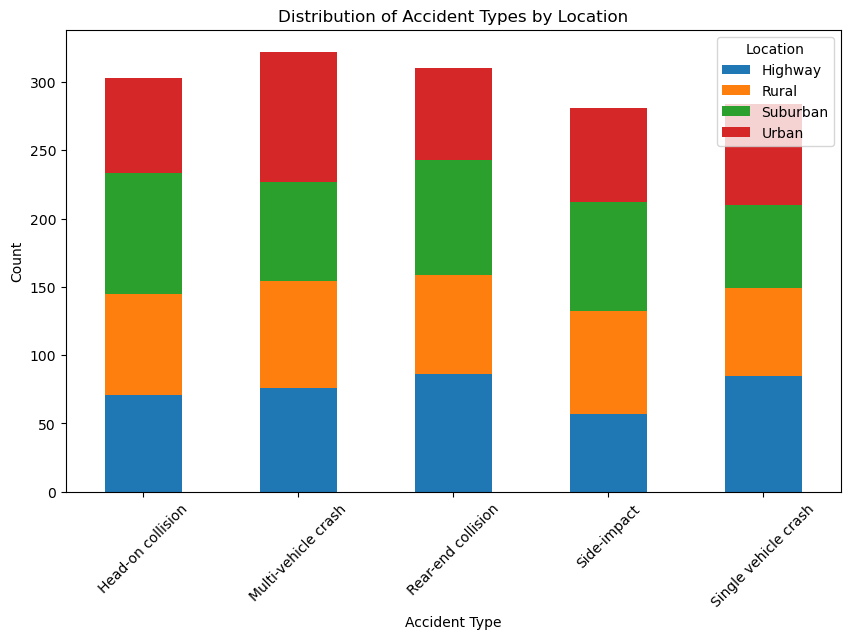

In [71]:
# Count of accident types by location
accident_type_by_location = pd.crosstab(data['Type_of_Accident'], data['Location'])
print("Accident Types by Location:\n", accident_type_by_location)

# Visualizing the distribution
accident_type_by_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Accident Types by Location')
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Accident Severity by Accident Type

Severity by Accident Type:
 Type_of_Accident  Head-on collision  Multi-vehicle crash  Rear-end collision  \
Severity                                                                       
Fatal                            76                   80                  69   
Minor                            73                   82                  78   
Moderate                         82                   74                  81   
Severe                           72                   86                  82   

Type_of_Accident  Side-impact  Single vehicle crash  
Severity                                             
Fatal                      79                    73  
Minor                      78                    72  
Moderate                   56                    68  
Severe                     68                    71  


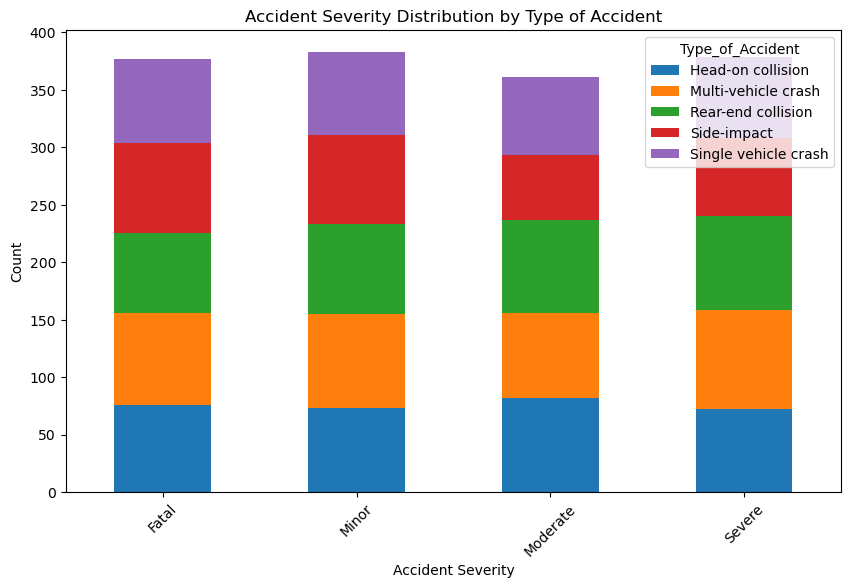

In [72]:
# Cross-tabulation between Severity and Type_of_Accident
severity_by_accident_type = pd.crosstab(data['Severity'], data['Type_of_Accident'])
print("Severity by Accident Type:\n", severity_by_accident_type)

# Visualizing the severity distribution by accident type
severity_by_accident_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity Distribution by Type of Accident')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Weather Impact on Severity

Severity by Weather Condition:
 Severity           Fatal  Minor  Moderate  Severe
Weather_Condition                                
Clear                 72     56        59      73
Cloudy                71     64        60      54
Fog                   54     61        67      64
Rain                  61     70        55      56
Snow                  48     69        70      67
Thunderstorm          71     63        50      65


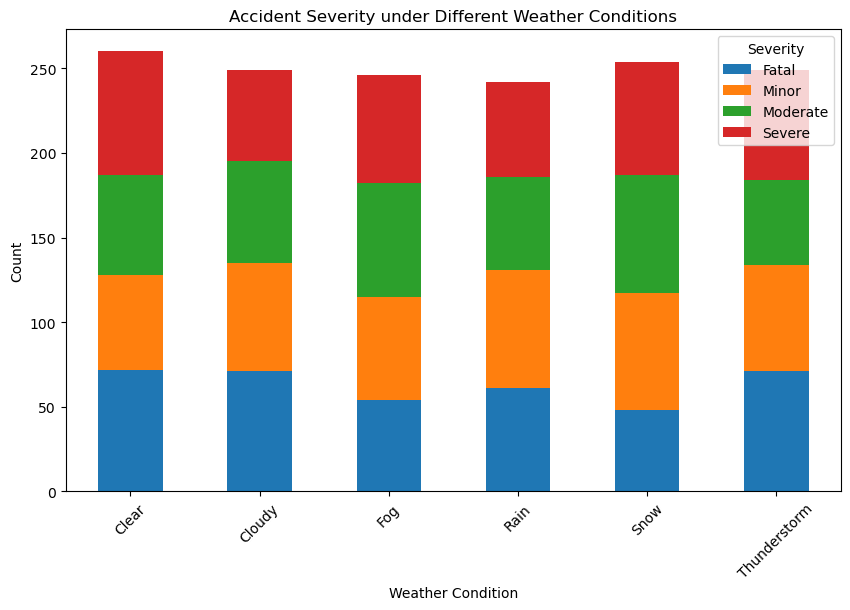

In [73]:
# Cross-tabulation between Weather Condition and Severity
weather_severity = pd.crosstab(data['Weather_Condition'], data['Severity'])
print("Severity by Weather Condition:\n", weather_severity)

# Visualizing severity distribution by weather conditions
weather_severity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity under Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Road Conditions Impact

Severity by Road Condition:
 Severity        Fatal  Minor  Moderate  Severe
Road_Condition                                
Dry               104    105        87      88
Icy                90    109       100      95
Snowy              94     79        80     107
Wet                89     90        94      89


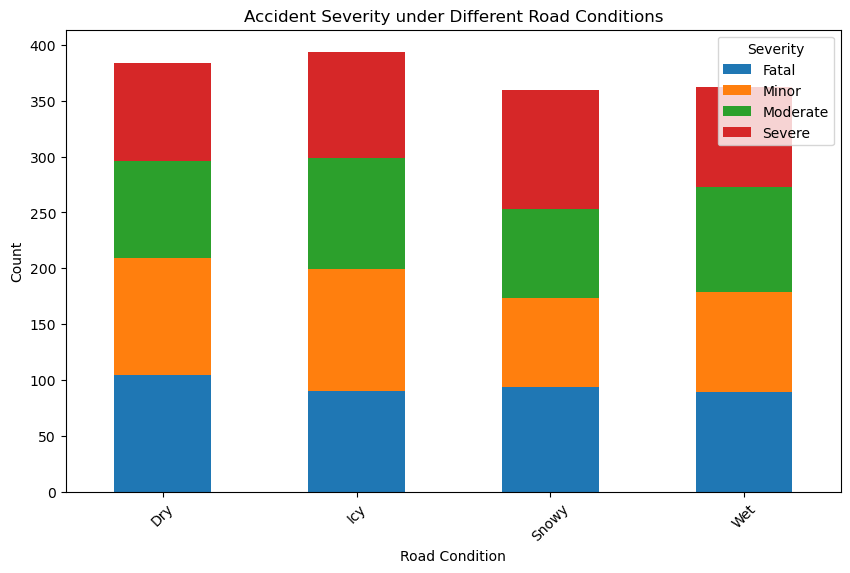

In [74]:
# Cross-tabulation between Road Condition and Severity
road_condition_severity = pd.crosstab(data['Road_Condition'], data['Severity'])
print("Severity by Road Condition:\n", road_condition_severity)

# Visualizing road conditions and severity
road_condition_severity.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity under Different Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Time Of Day Analysis

Accidents by Time of Day:
 Night        395
Evening      375
Morning      370
Afternoon    360
Name: Time_of_Day, dtype: int64


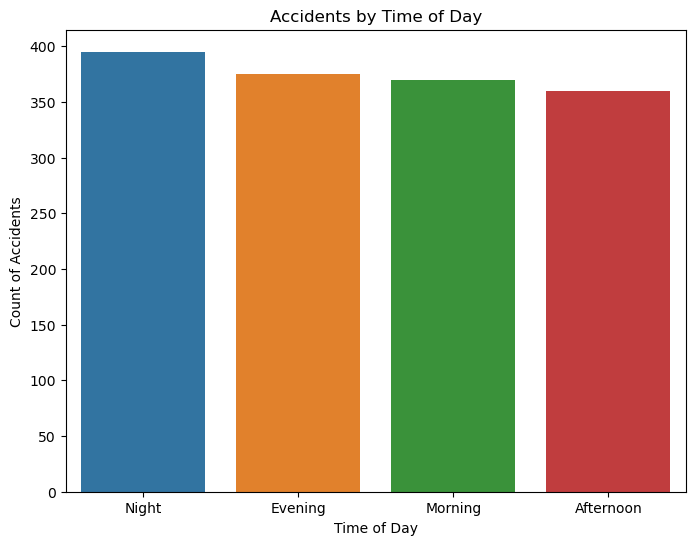

In [75]:
# Count of accidents by time of day
time_of_day_counts = data['Time_of_Day'].value_counts()
print("Accidents by Time of Day:\n", time_of_day_counts)

# Visualizing time of day impact
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Time_of_Day', order=data['Time_of_Day'].value_counts().index)
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Accidents')
plt.show()


Heatmap Correlation

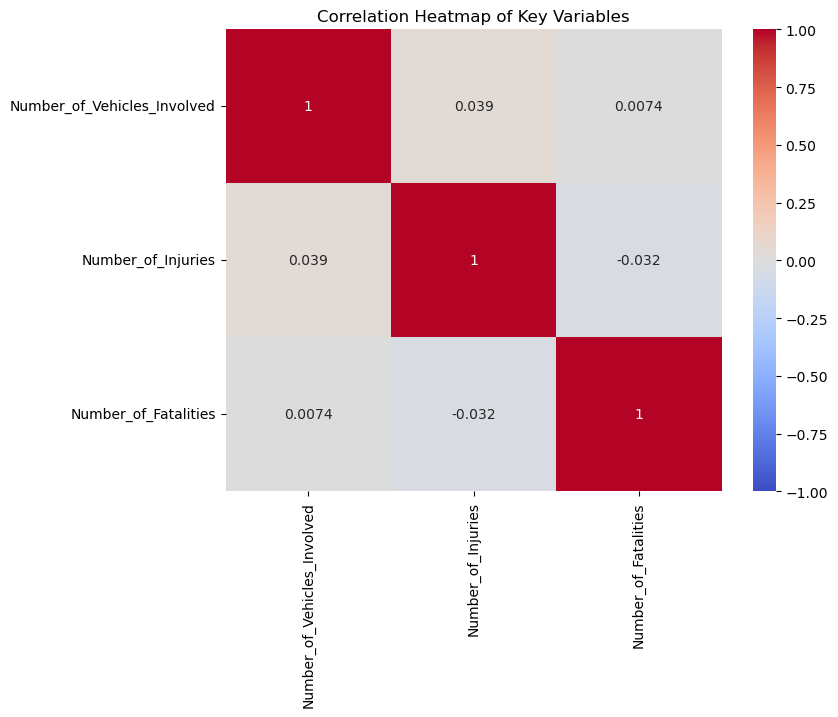

In [77]:
# Correlation matrix
corr_matrix = data[['Number_of_Vehicles_Involved', 'Number_of_Injuries', 'Number_of_Fatalities']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

## Insight Summary

-*Accident Types*-: Rear-end and side-impact collisions are the most common, especially in urban areas. However, more severe accidents (e.g., head-on collisions) happen frequently in rural areas. 

-Severity:- The majority of accidents are minor or moderate, but the risk of fatal accidents increases significantly during poor weather or road conditions. -Weather and Road Conditions:- Accidents in rain or icy conditions tend to result in more 
severe outcomes. Clear weather has more frequent accidents b

-Weather and Road Conditions:- Accidents in rain or icy conditions tend to result in more severe outcomes. Clear weather has more frequent accidents but less severe outcomes.

-*Time of Day:*- Night and evening hours present higher risks, with morning rush hours being hotspots for minor accidents.

-*Fatalities and Injuries:*- There’s a weak correlation between the number of vehicles involved and the severity (fatalities or injuries) of accidents, particularly in rural or highway locations.